<a href="https://colab.research.google.com/github/Bluelord/Intro_to_ML_Python_Notes/blob/master/Supervised_Learning/Linear_Models_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Models**

### **Linear model for regression**


Linear models make a prediction using a *linear function* of the input features, for regression the general prediction formula is given as

$ \hat{y} = w[0]*x[0] +  w[1]*x[1] + ... + w[p]*x[p] + b$

$x[0]$ to $x[p]$ are the **p** features of a single data points, $w$ & $b$ are parametes of the model that are learned and $\hat{y}$ is the prediction. $w$ is slope along each features axis and $b$ is offset value. The predicted value is a weighted sum of the input features (weight as $w$).

Linear Model can be chrecterized as regression model for which the predictions are in a line for single feature, a plane for two feature or a hyperplane fir higher dimentions. When we have many features, linear model can be powerful tool to predict the output, aspecially when there is more features than data points.There are different linear models for regression depanding upon how model parameters $w$ & $b$ are learned and how the model complexity can be controlled.

#### **Linear Regression (aka ordinary least squares)**

In this the parameters $w$ & $b$ are found by minimizing the *mean sqare error* between prediction and the true regression target $y$ on training set. Linear Regression has no parameter to control the model complexity.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# Generate features matrix, target vector, and the true coefficients
X, y = make_regression(n_samples = 1500, n_features = 3, n_informative = 3,
                                     n_targets = 1, noise = 70, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=70)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Linear Regression coefficients: {}" .format(
    lr.coef_))
print("Liner Regression intercept: {}" .format(
    lr.intercept_))
print("Training set score: {: .2f}" .format(
    lr.score(X_train, y_train)))
print("Test set score: {: .2f}" .format(
    lr.score(X_test, y_test)))

Linear Regression coefficients: [ 32.57113713  26.14391155 100.86277445]
Liner Regression intercept: -4.6295875143597165
Training set score:  0.71
Test set score:  0.62


In [30]:
# mglearn to get extended boston dataset
!pip install mglearn

In [31]:
# Generating 100 feature data (only 25 important features)
import mglearn
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training set score: {: .2f}" .format(
    lr.score(X_train, y_train)))
print("Test set score: {: .2f}" .format(
    lr.score(X_test, y_test)))

Training set score:  0.94
Test set score:  0.78


At low feature number model is most likly to be underfitting,when number of features are very high there is a higher chance of overfitting. Thus when we find such overfitting case we have to fine a model in which wr can control the model complexity, such alternatives are Ridge Regression and LASSO.

#### **Ridge Regression**

In this type of linear model, complexity controlling parameter is added to the ordinary linear regression model. By adding this parameter, most of the coeficient $w$ should become close to zero, which mean the effect of features on the output will be as little ad possible, this effect is called ad regularization. This regularization avoids the model to get overfitted, this regression regularization is also called as *L2 regularization*.

In [32]:
# Generating 100 feature data (only 25 important features)
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {: .2f}" .format(
    ridge.score(X_train, y_train)))
print("Test set score: {: .2f}" .format(
    ridge.score(X_test, y_test)))

Training set score:  0.87
Test set score:  0.81


In [33]:

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set  for alpha 0.1: {: .2f}" .format(
    ridge01.score(X_train, y_train)))
print("Test set score for alpha 0.1: {: .2f} \n" .format(
    ridge01.score(X_test, y_test)))

ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score for alpha 0.01: {: .2f}" .format(
    ridge001.score(X_train, y_train)))
print("Test set score for alpha 0.01: {: .2f} \n" .format(
    ridge001.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score for alpha 10: {: .2f}" .format(
    ridge10.score(X_train, y_train)))
print("Test set score for alpha 10: {: .2f}" .format(
    ridge10.score(X_test, y_test)))

Training set  for alpha 0.1:  0.92
Test set score for alpha 0.1:  0.82 

Training set score for alpha 0.01:  0.94
Test set score for alpha 0.01:  0.81 

Training set score for alpha 10:  0.77
Test set score for alpha 10:  0.73


Ridge is more restricted model, so its less likly to overfit. Less complex model means worse performance on trainig but better generalization. Ridge model can make trade-off between the simplicity of model and its performance on training set by choosing the *alpha parameter*. This value depends on the dataset, inceasing *alpha* forces coefficients to move more towards zero and decreasing it will make model less restricted.

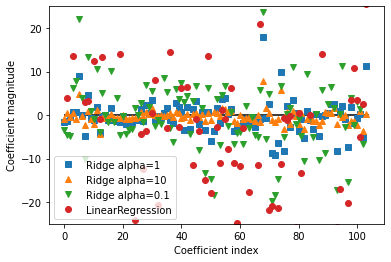

In [34]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

We can also understand the influence of regularization by fixing the alpha value and changing the size of samples of dataset. mglearns provides the plot which shows performance as a function of data size called learning curves. The plot shows the learning curves for ridge regression and linear regression on the Boston Housing dataset.

As expected training score is higher than the test set for all the dataset size. since the ridge is regularized the training score is low in ridge than linear regression. For low datasize LR is not able to learn better, but due to regularization Ridge learn better as the data size to certain value the performance LR catches up with Ridge. With enough dataset size regularization become less important and both gives same score for test set.

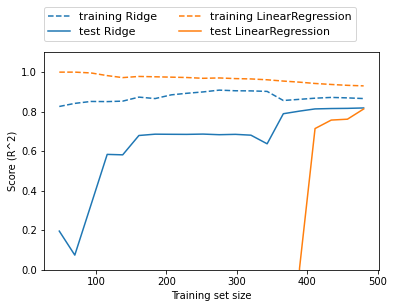

In [35]:
mglearn.plots.plot_ridge_n_samples()

#### **LASSO**

LASSO regression also restrict the coefficients, it is also called as *L1 regularization*. While using Lasso regression we are expected taht some of the coefficients hets exactly zero, which means this features are entirly ignored by the model. We can also consider LASSO as a form of automatic feature selection model.

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score : 0.27
Test set score: 0.26
Number of features used: 3


In [37]:
# To reduce underfitting, we can try decreasing alpha and increase max_iter
# otherwise the model would warn us that we should increase max_iter.

lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("Training set score for alpha 0.1: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test set score for alpha 0.1: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used for alpha 0.1: {}\n".format(np.sum(lasso01.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score for alpha 0.01: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score for alpha 0.01: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used for alpha 0.01: {}\n".format(np.sum(lasso001.coef_ != 0)))

lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score for alpha 0.001: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score for alpha 0.001: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used for alpha 0.001: {}\n".format(np.sum(lasso0001.coef_ != 0)))

lasso000001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)
print("Training set score for alpha 0.0001: {:.2f}".format(lasso000001.score(X_train, y_train)))
print("Test set score for alpha 0.0001: {:.2f}".format(lasso000001.score(X_test, y_test)))
print("Number of features used for alpha 0.0001: {}".format(np.sum(lasso000001.coef_ != 0)))

Training set score for alpha 0.1: 0.75
Test set score for alpha 0.1: 0.70
Number of features used for alpha 0.1: 12

Training set score for alpha 0.01: 0.89
Test set score for alpha 0.01: 0.80
Number of features used for alpha 0.01: 34

Training set score for alpha 0.001: 0.93
Test set score for alpha 0.001: 0.82
Number of features used for alpha 0.001: 73

Training set score for alpha 0.0001: 0.94
Test set score for alpha 0.0001: 0.78
Number of features used for alpha 0.0001: 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133.53671512355777, tolerance: 3.361037625329816
  positive)


For alpha=1, we not only see that most of the coefficients are zero, but that the remaining coefficients are also small in magnitude and we may also get underfitted model. Decreasing the alpha, we can see more feature are used as well as the performace increases,but as we decrease alpha more more features are selected and model gets overfitted and we get the unregularized mosel too. thus we must have to select the alpha value in between to get optimal result.

Text(0, 0.5, 'Coefficient magnitude')

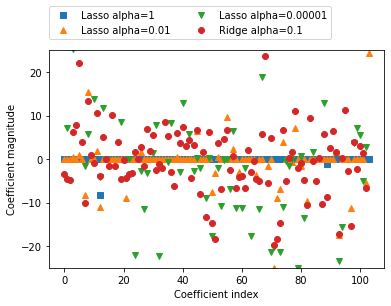

In [38]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso000001.coef_, 'v', label="Lasso alpha=0.00001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In practice, Ridge is the first choice and if we are expect only few feature from the large feature dataset then LASSO is the best choice. scikit has **ElasticNet class* which combines the penalties (regularization term) of Lasso and Ridge, which works best at the price of tuning two parameters, L1 & L2 regularuzations to adjest.